<a href="https://colab.research.google.com/github/onderkilinc/Neural-Networks/blob/main/Statistical_Machine_Learning_PS4_(Neural_Networks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # to normalise the data from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
plt.rcParams['figure.dpi'] = 200

(X,y) = load_wine(return_X_y = True, as_frame = True)
Xy = pd.concat([X, y], axis=1)
(n, p) = X.shape # number of examples and dimension of each example
K = y.unique().size # number of classes
print('n=', n, ', p=', p, ', K=', K)
X.head()

n= 178 , p= 13 , K= 3


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Question 5a

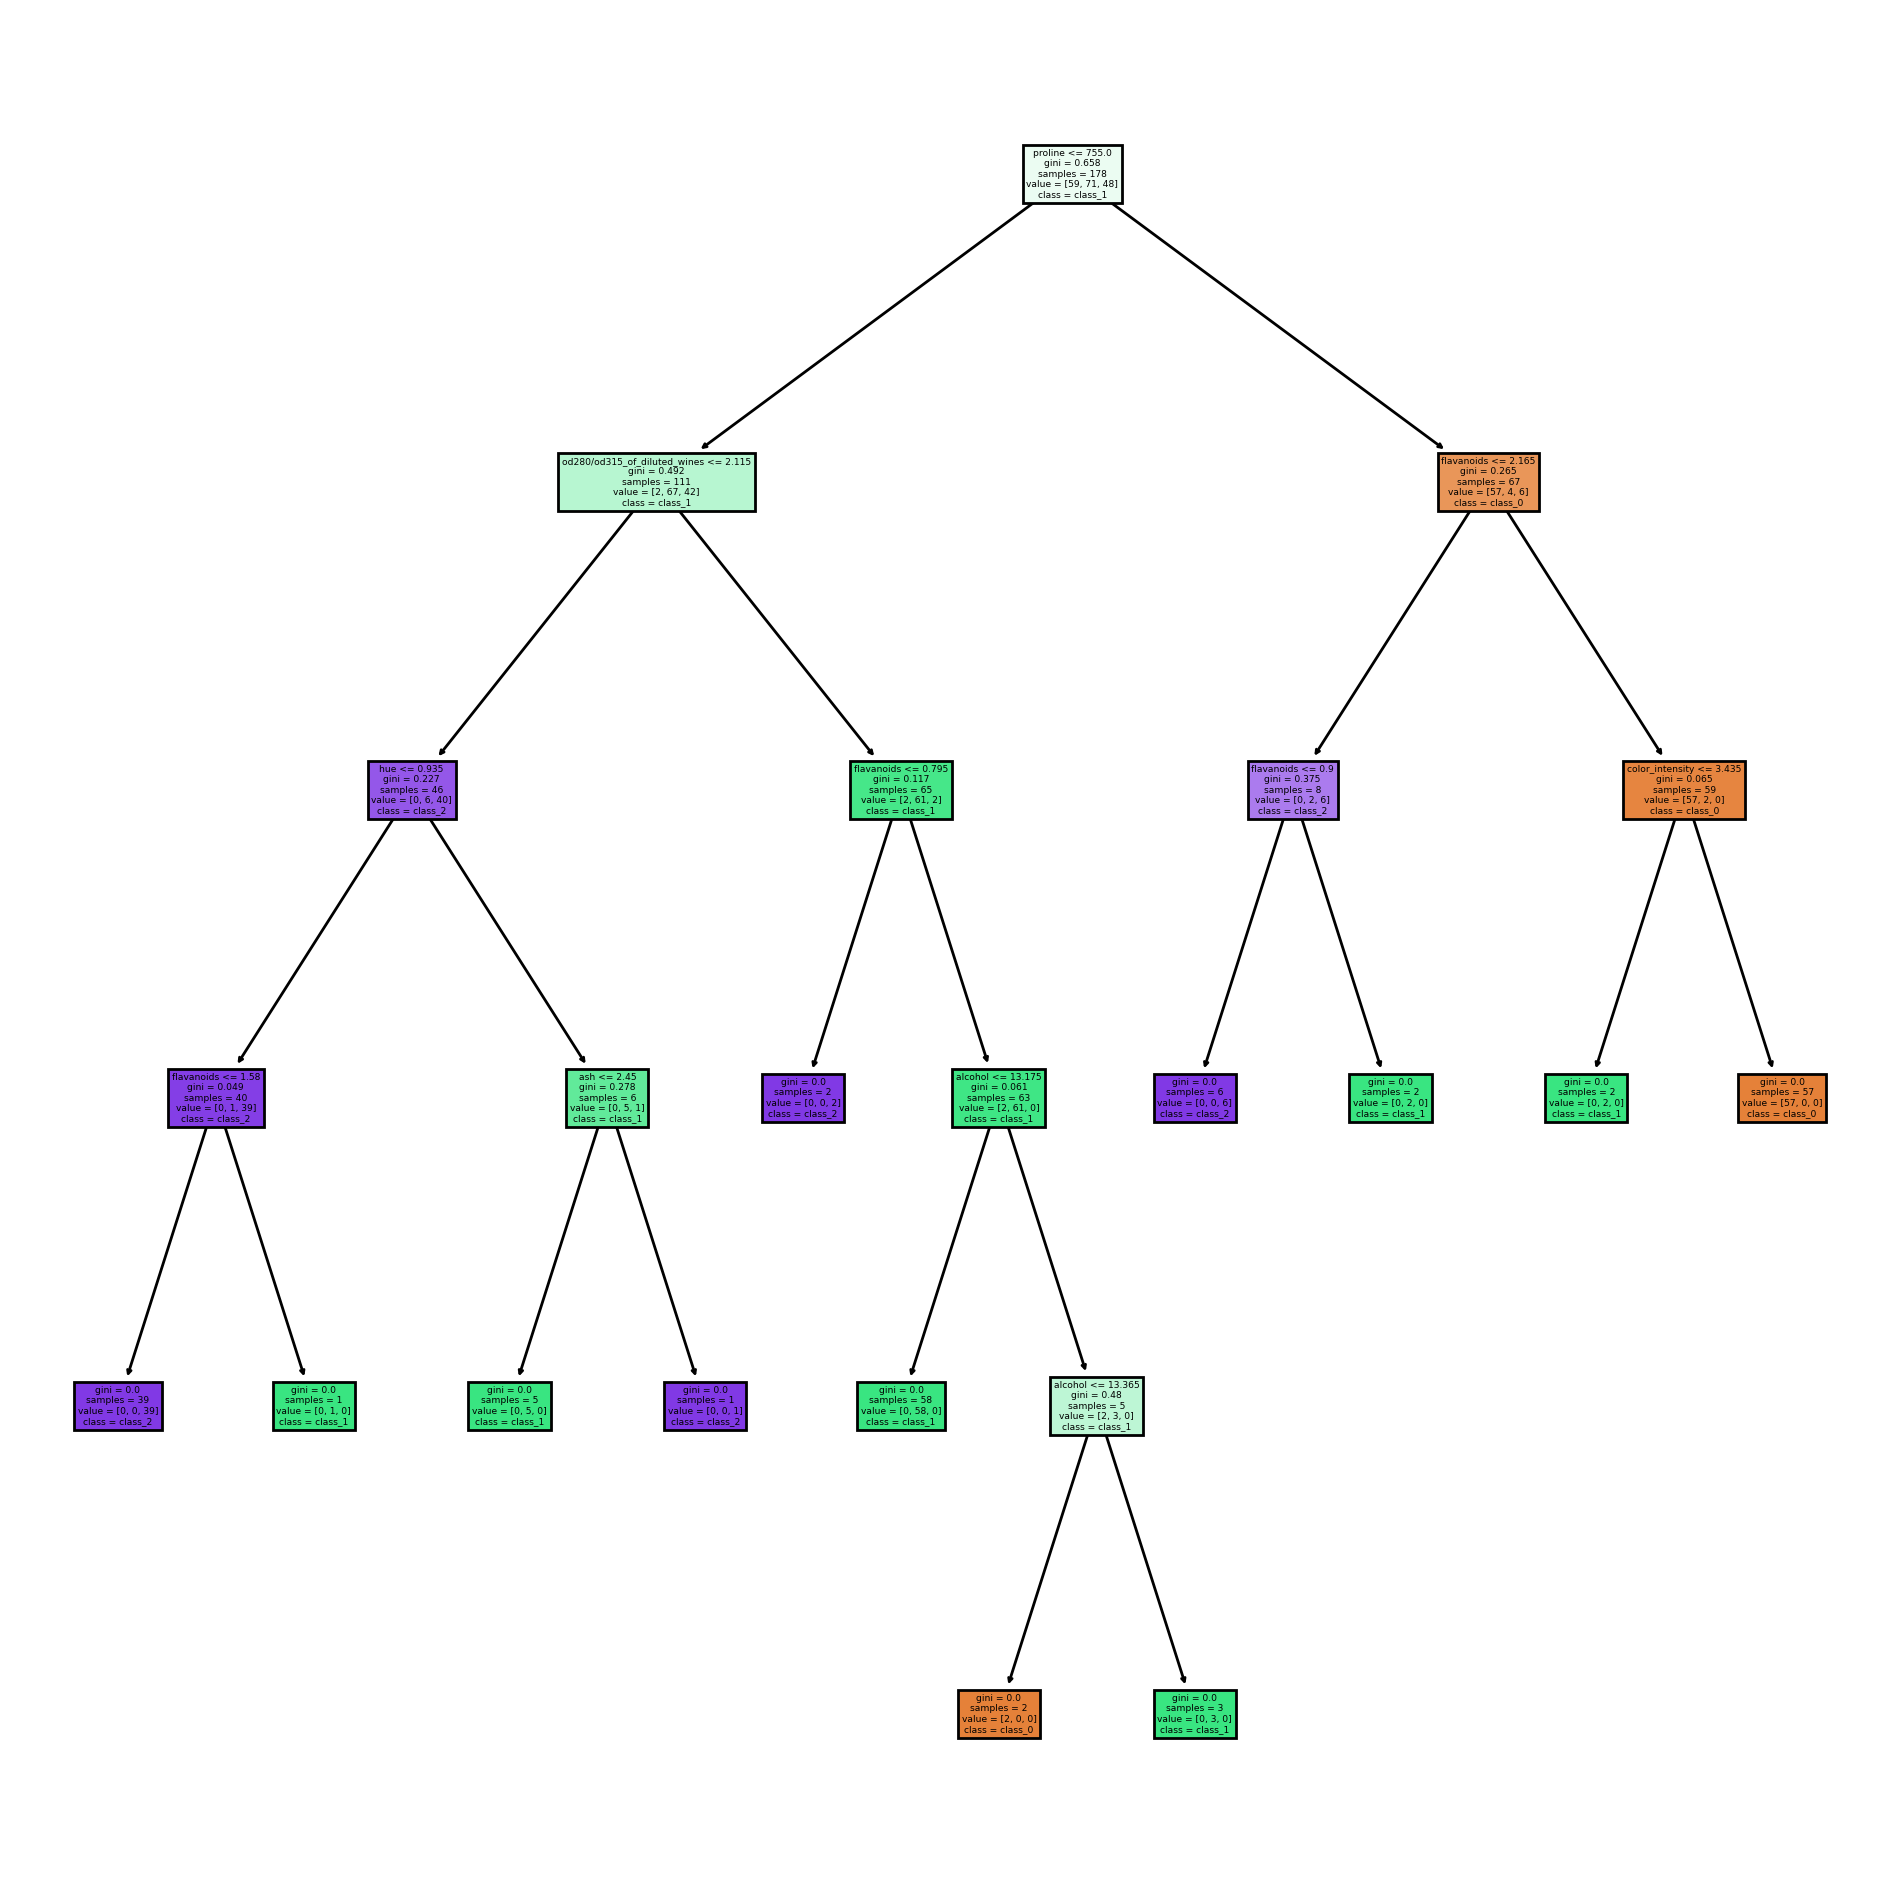

In [ ]:
clf = DecisionTreeClassifier() #fits classification tree
clf.fit(X, y)

plt.figure(figsize=(12,12))
plot_tree(clf, filled=True, feature_names=load_wine().feature_names, class_names=load_wine().target_names)
plt.show()

#LDA models differences between classes by using linear combitations that seperate them. Classification, on the other hand, are based on thresholds that split the data and create a tree with decision paths.


In [ ]:
risk_num = []
leaf_nodes = list(range(5, 51, 5))  #  leaf nodes from 5 to 50 in steps of 5 for 5 cross validation
for num_leaves in leaf_nodes:
    clf = DecisionTreeClassifier(max_leaf_nodes=num_leaves)
    risk = np.mean(cross_val_score(clf, X, y, cv=5))
    risk_num.append(risk) #for loop to create decision tree classifier and perform cross-validation

for num_leaves, risk in zip(leaf_nodes, risk_num): #calculated risk values for different leaf nodes
    print(f"# of leaf nodes: {num_leaves}, Risk: {risk}")


# of leaf nodes: 5, Risk: 0.870952380952381
# of leaf nodes: 10, Risk: 0.8876190476190476
# of leaf nodes: 15, Risk: 0.8765079365079365
# of leaf nodes: 20, Risk: 0.8709523809523809
# of leaf nodes: 25, Risk: 0.8931746031746032
# of leaf nodes: 30, Risk: 0.8652380952380951
# of leaf nodes: 35, Risk: 0.8653968253968254
# of leaf nodes: 40, Risk: 0.8709523809523809
# of leaf nodes: 45, Risk: 0.882063492063492
# of leaf nodes: 50, Risk: 0.8931746031746032


Optimal # of leaf nodes: 25, Minimum risk: 0.8931746031746032


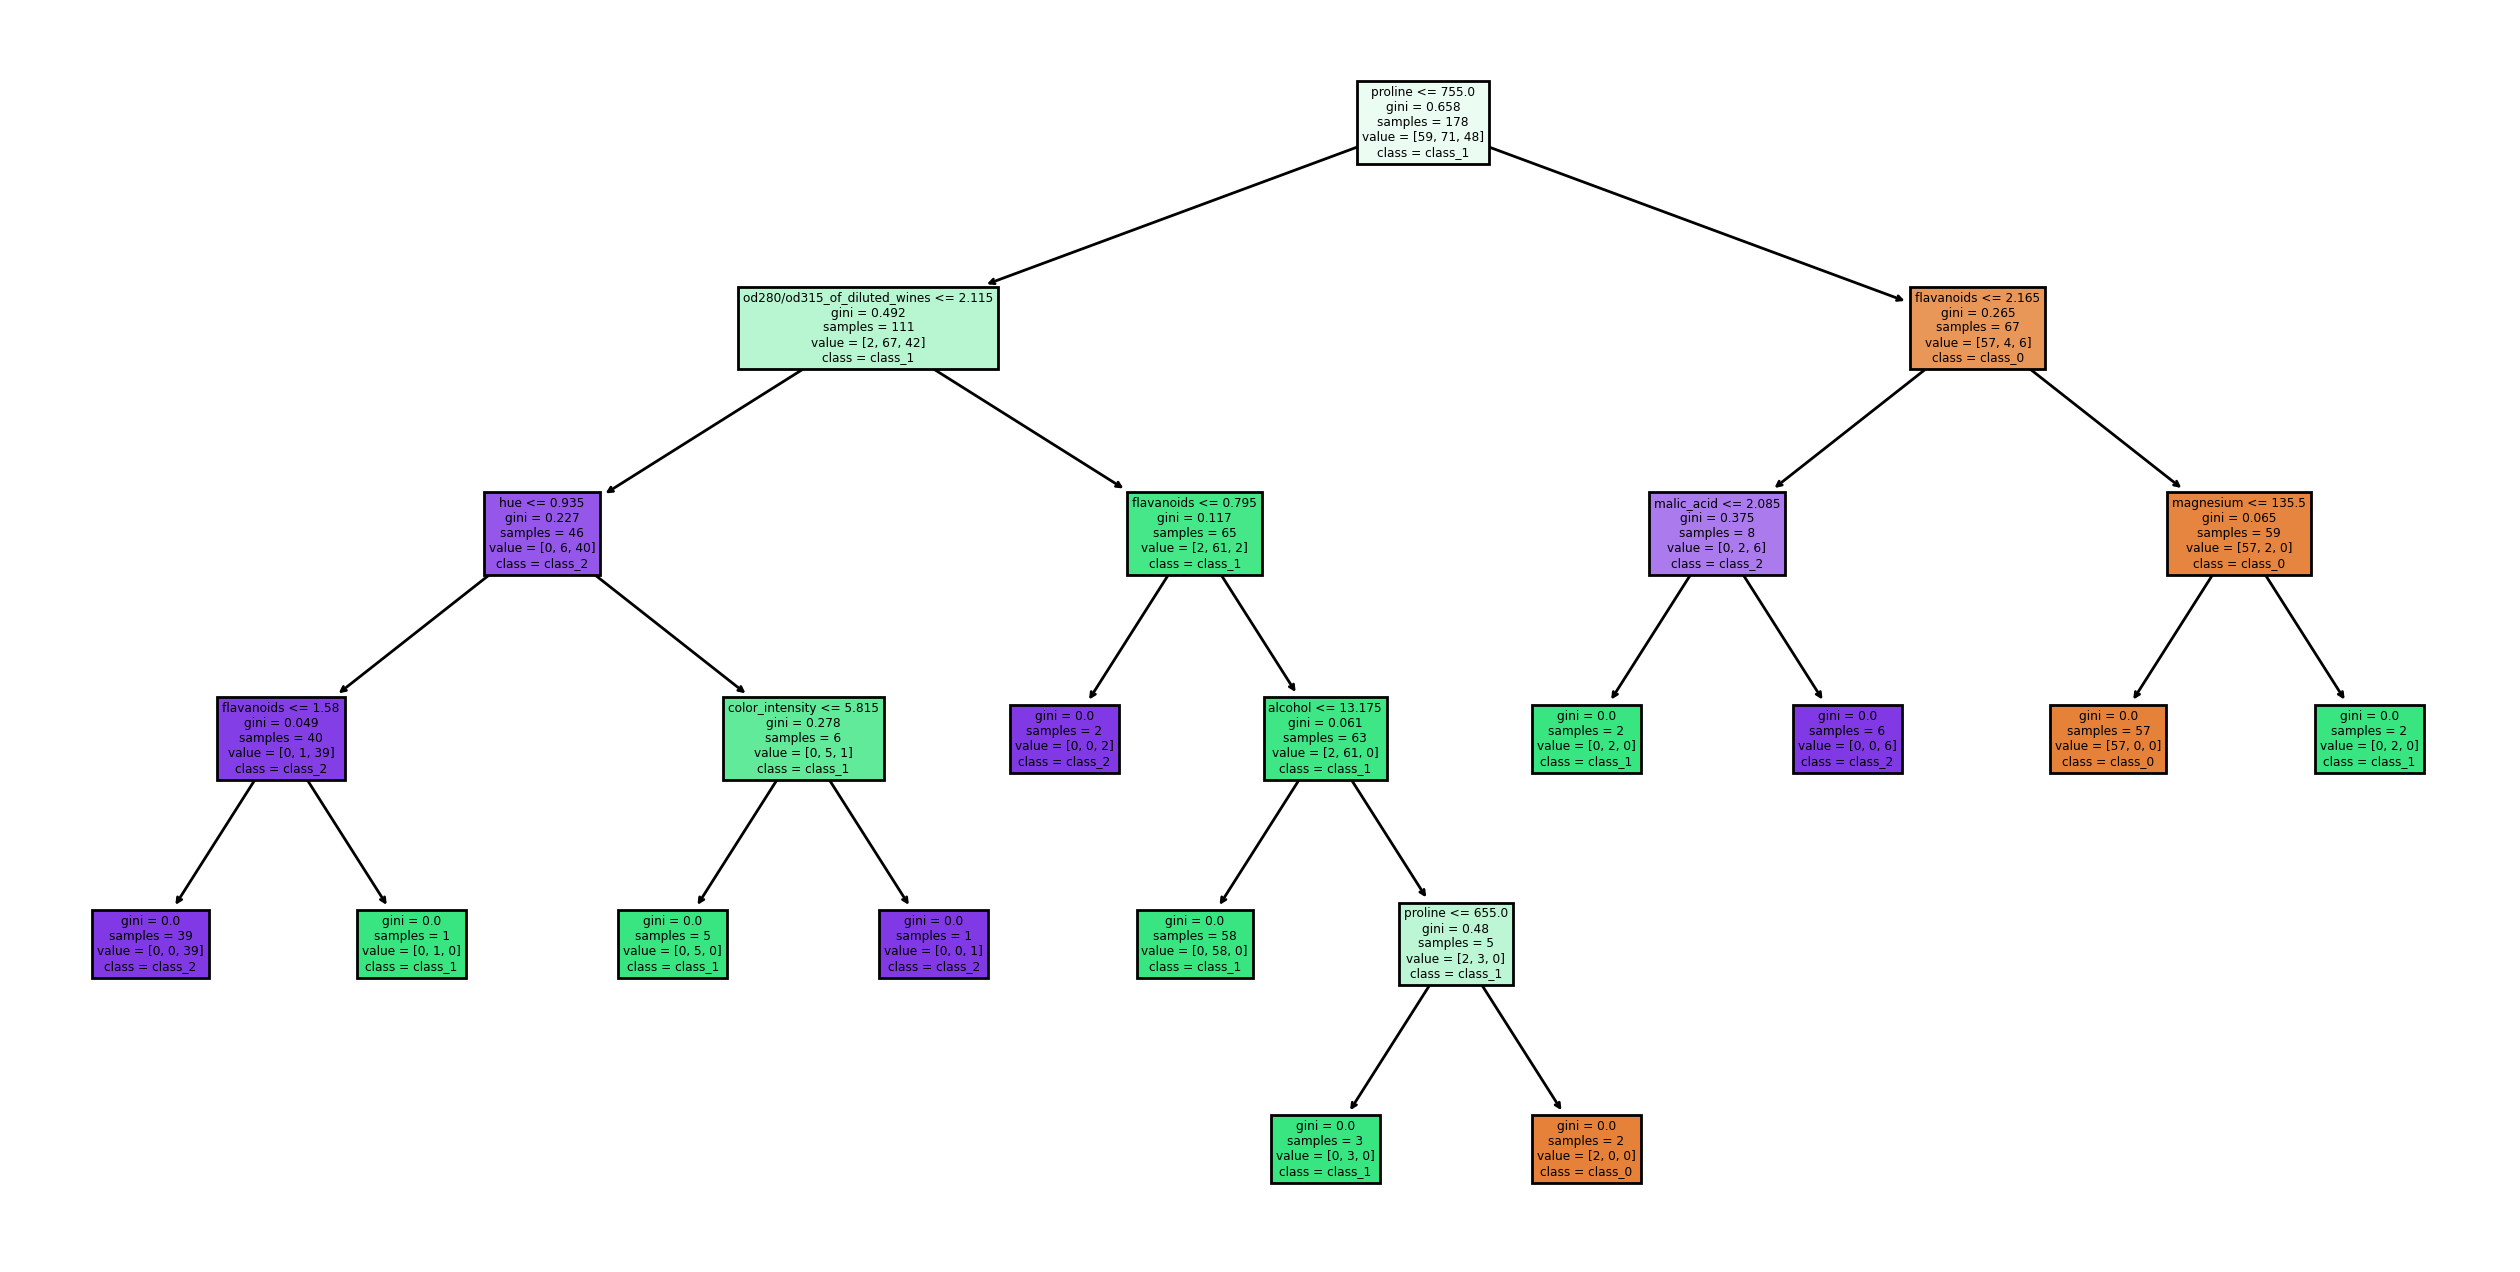

In [ ]:
opt_leaves_index = np.argmax(risk_num)
opt_leaves = leaf_nodes[opt_leaves_index] #minimizing cross-validation score

print(f"Optimal # of leaf nodes: {opt_leaves}, Minimum risk: {risk_num[opt_leaves_index]}")


opt_clf = DecisionTreeClassifier(max_leaf_nodes=opt_leaves)
opt_clf.fit(X, y) #refit tree on optimal nodes

plt.figure(figsize=(16, 8))
plot_tree(opt_clf, filled=True, feature_names=load_wine().feature_names, class_names=load_wine().target_names)
plt.show() #plots and shows optimal tree

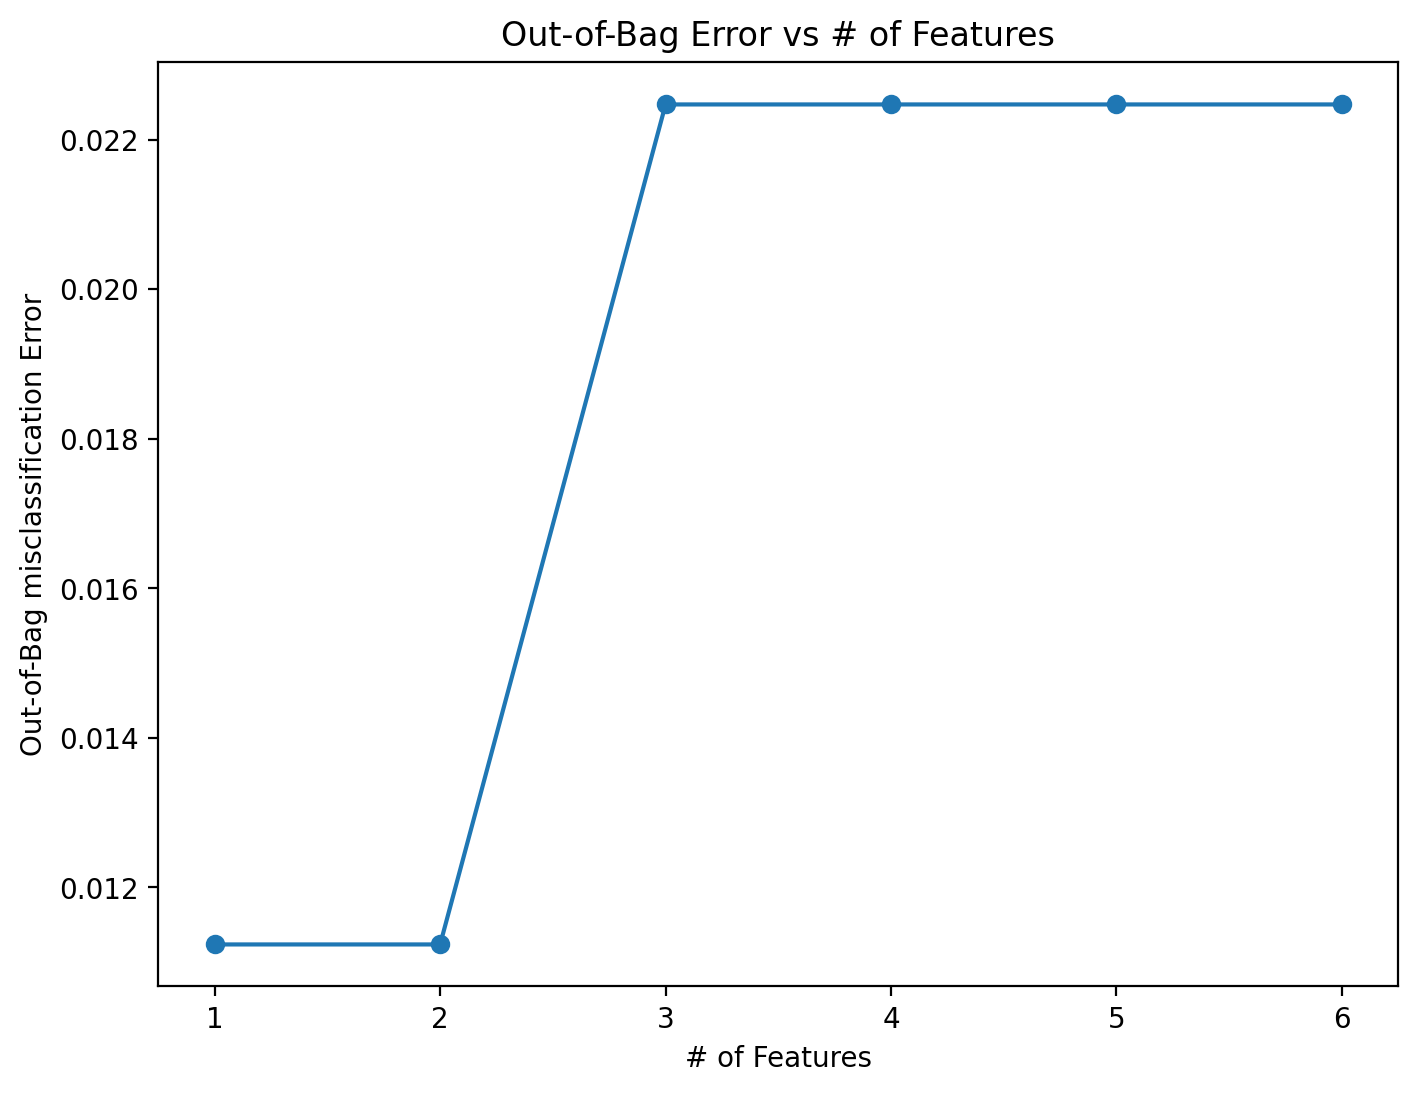

In [ ]:
oob= [] #creates list for out of bag misclassification

num_ft_range = list(range(1, 7))  # Consider 1 to 6 features

for num_ft in num_ft_range:
    clf = RandomForestClassifier(n_estimators=500, max_features=num_ft, oob_score=True, random_state=42)
    clf.fit(X, y)
    oob.append(1 - clf.oob_score_) #for loop for 500 trees in forest clasifier


# Plot the OOB errors
plt.figure(figsize=(8, 6))
plt.plot(num_ft_range, oob, marker='o')
plt.xlabel('# of Features')
plt.ylabel('Out-of-Bag misclassification Error')
plt.title('Out-of-Bag Error vs # of Features')
plt.xticks(num_ft_range)
plt.show()

Question 6

Training: (898, 64)
Test: (899, 64)


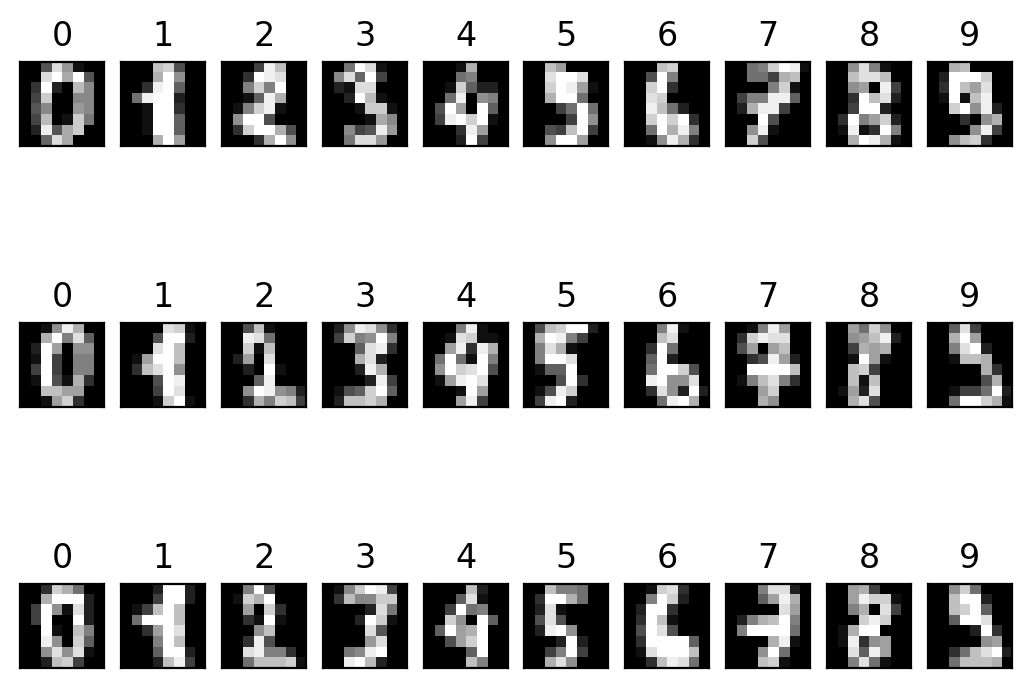

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # to normalise the data
# Load data
(X, y) = load_digits(return_X_y=True, as_frame=True, n_class = 10)

  # Plot some images in the dataset
for i in range(30):
  plt.subplot(3, 10, i + 1)
  image = X.loc[i,:].to_numpy()
  plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray)
  plt.title(y[i])
  plt.xticks(())
  plt.yticks(())
  # Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print('Training:', X_train.shape)
print('Test:', X_test.shape)
# Scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)


In [ ]:
logistic_model = LogisticRegression(max_iter=999)
logistic_model.fit(X_train_sc, y_train) #fits logistic regression, iterating 999 times

y_train_pred = logistic_model.predict(X_train_sc)
y_test_pred = logistic_model.predict(X_test_sc) #prediction rule for training and testing sets


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred) #computes accuracy on both testing and training sets

print(f"accuracy on training set: {train_accuracy:.4f}")
print(f"accuracy on test set: {test_accuracy:.4f}")

accuracy on training set: 1.0000
accuracy on test set: 0.9655


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


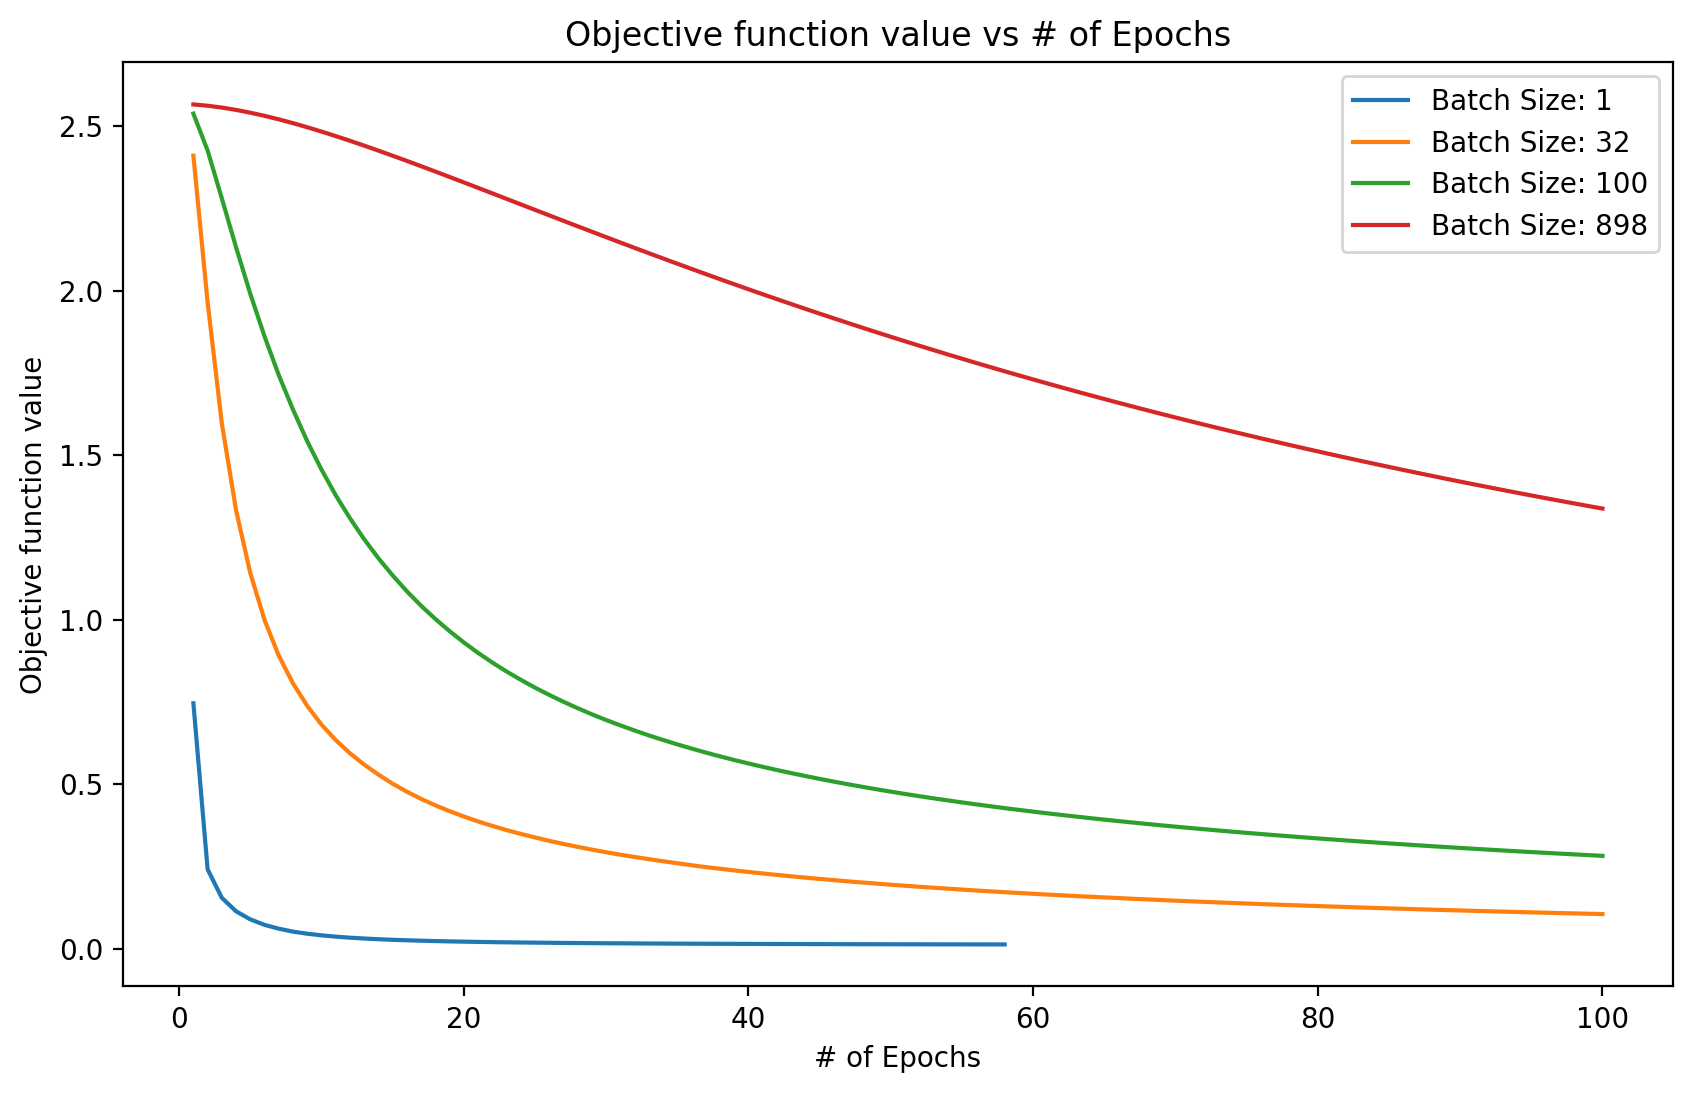

In [ ]:
batch_ss = [1, 32, 100, 898]
loss_curves = {} #creates a dictionary for loss curves

for batch_size in batch_ss:
    mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', solver='sgd', batch_size=batch_size,
                        max_iter=100, random_state=42) #50 neurons, for loop with one hidden layer and tanh activation


    mlp.fit(X_train_sc, y_train) #fits model


    loss_curves[batch_size] = mlp.loss_curve_ #stores loss values into dictionary

plt.figure(figsize=(10, 6))
for batch_size, loss_curve in loss_curves.items():
    plt.plot(range(1, len(loss_curve) + 1), loss_curve, label=f'Batch size: {batch_size}') #
plt.xlabel('# of Epochs')
plt.ylabel('Objective function value')
plt.title('Objective function value vs # of Epochs')
plt.legend()
plt.show()